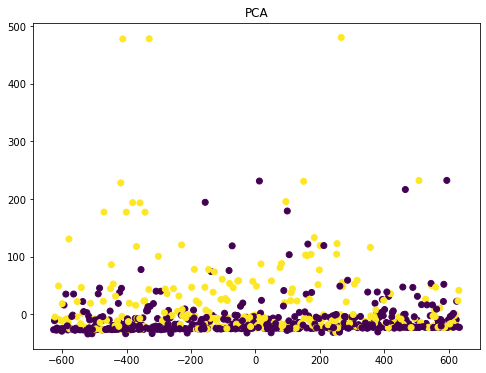

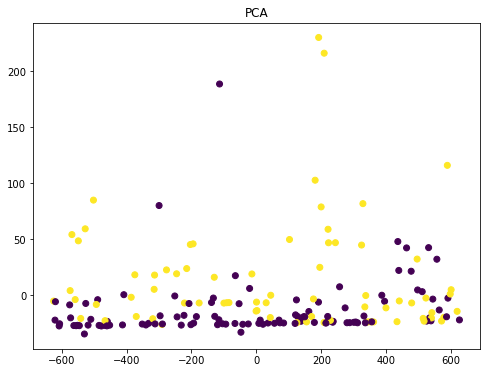

C:\Users\USER\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


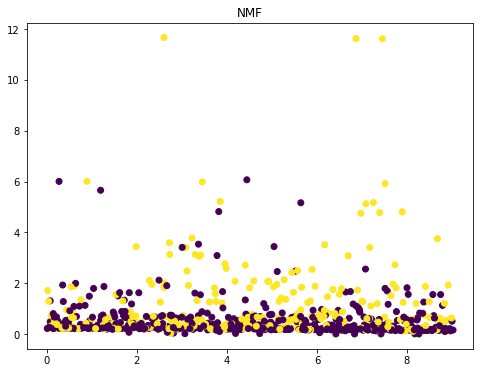

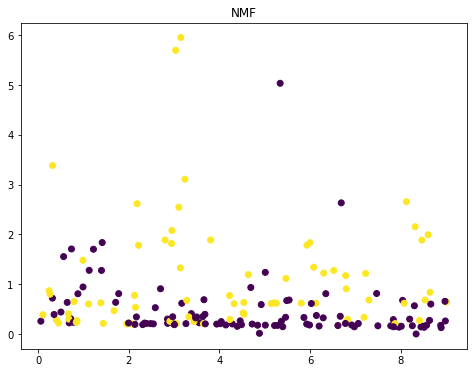

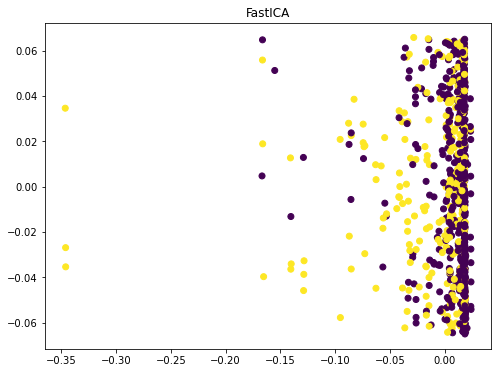

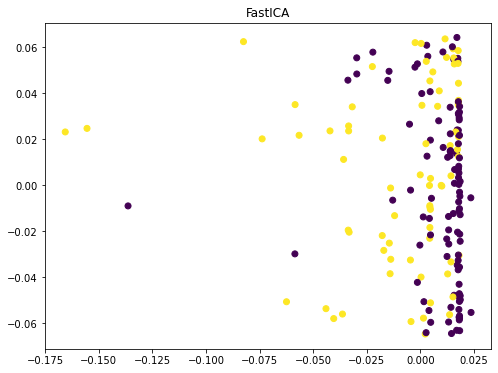

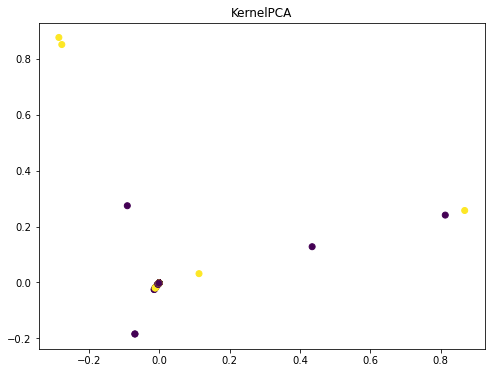

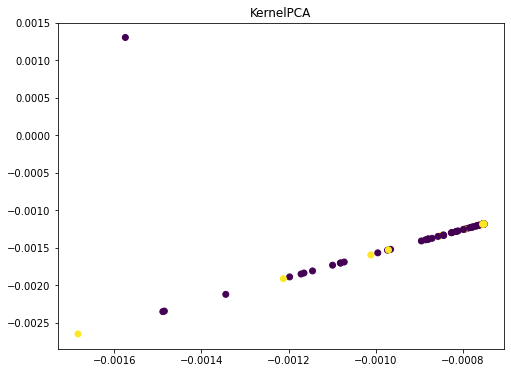

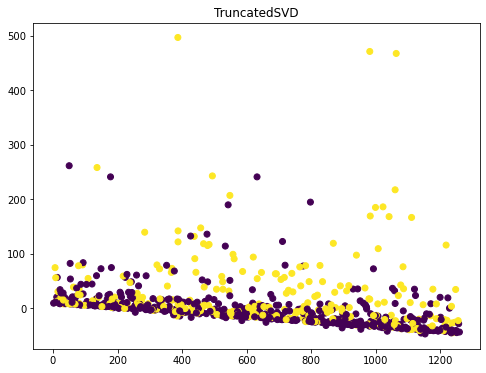

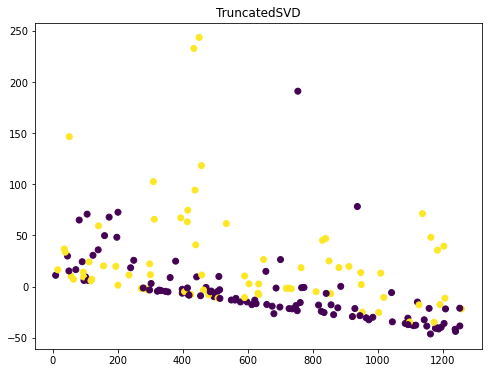

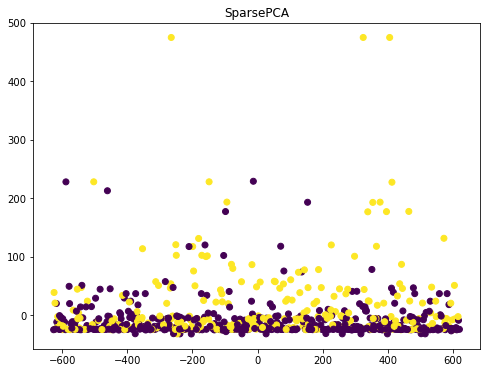

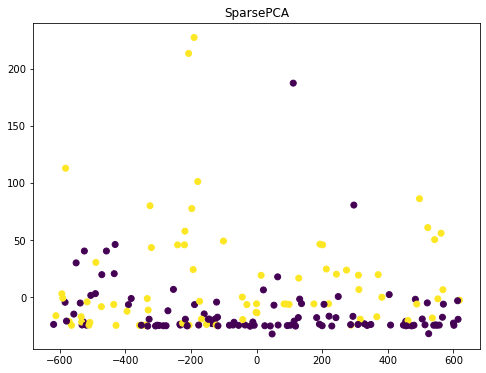

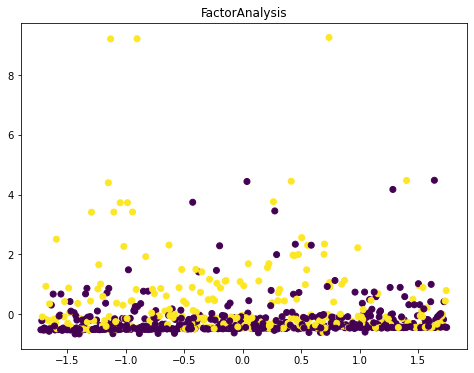

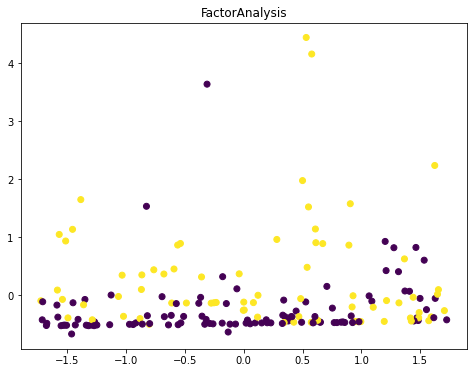

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF, FastICA, KernelPCA, TruncatedSVD, SparsePCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler

x = pd.read_csv("C:/Users/USER/Documents/Machine_Learning_Algorithms/Datasets/titanic.csv")

#Preprocess and split the data

le=preprocessing.LabelEncoder()
x["Sex"]=le.fit_transform(x["Sex"])
x["Sex"].unique()

x.isnull().sum()

x['Age'].fillna(x['Age'].median(), inplace=True)

x = x.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1)

X=x.drop(['Survived'],axis=1)
y=x['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the dimensionality reduction methods to be used
drc = [
    PCA(n_components=2),
    NMF(n_components=2),
    FastICA(n_components=2),
    KernelPCA(n_components=2, kernel='rbf'),
    TruncatedSVD(n_components=2),
    SparsePCA(n_components=2, alpha=1),
    FactorAnalysis(n_components=2)
]

# Loop over the dimensionality reduction methods
for dr in drc:
    # Fit the dimensionality reduction method to the train set
    X_train_dr = dr.fit_transform(X_train)
    
    # Plot the reduced data for the train set
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_dr[:, 0], X_train_dr[:, 1], c=y_train, cmap='viridis')
    plt.title(type(dr).__name__)
    plt.show()
    
    # Transform the test set using the fitted dimensionality reduction method
    X_test_dr = dr.transform(X_test)
    
    # Plot the reduced data for the test set
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_dr[:, 0], X_test_dr[:, 1], c=y_test, cmap='viridis')
    plt.title(type(dr).__name__)
    plt.show()
